# Task 8: Clustering with K-Means

## Objective
To perform unsupervised learning using K-Means clustering.

## Tools Used
- Python
- Scikit-learn
- Pandas
- Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dataset Overview

The Mall Customers dataset contains customer information such as:
- Gender
- Age
- Annual Income
- Spending Score

Goal: Segment customers into groups based on similarity.

In [3]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

## Feature Selection

We selected Annual Income and Spending Score to identify customer segments.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Feature Scaling

K-Means uses distance calculations.
Scaling ensures fair contribution of all features.

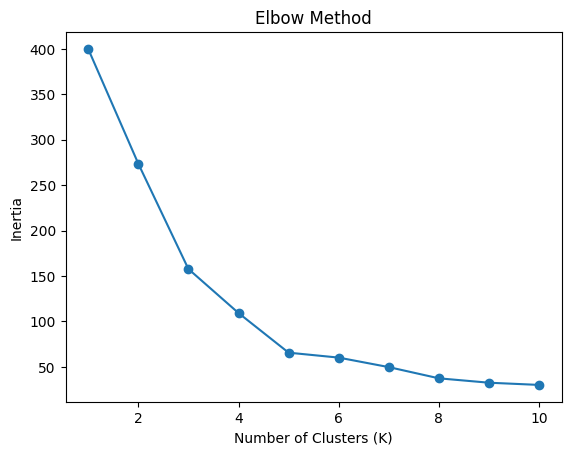

In [5]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

## Elbow Method

The Elbow Method helps determine optimal K.
The point where inertia decreases slowly indicates ideal cluster count.

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

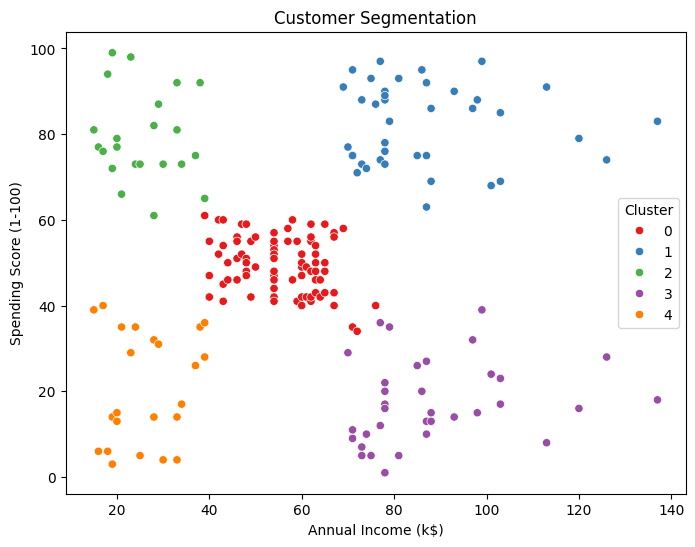

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="Set1"
)
plt.title("Customer Segmentation")
plt.show()

## Cluster Visualization

Each color represents a different customer segment.
Customers in the same cluster share similar spending behavior.

In [8]:
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091


## Silhouette Score

Silhouette Score evaluates clustering quality.
Range: -1 to 1
Higher score = better cluster separation.

## Final Conclusion

- K-Means successfully segmented customers.
- Elbow Method helped determine optimal cluster count.
- Silhouette Score validated clustering performance.
- Customer segmentation can support marketing strategy.